<a href="https://colab.research.google.com/github/mayank5464942/Stock-Prices-Prediction/blob/master/FB_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing required dataset
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing the dataset
df=pd.read_csv('/content/drive/My Drive/Stock_pred/Dataset/NSE-TATAGLOBAL11.csv')


In [0]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


In [0]:
#sorting
data = df.sort_index(ascending=True, axis=0)


In [0]:
#importing prophet
from fbprophet import Prophet



In [0]:
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [0]:
#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)



In [0]:
#train and validation
train = new_data[:987]
valid = new_data[987:]



In [13]:
#fit the model
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-08,149.334671,148.743072,167.386106,149.334671,149.334671,8.658394,8.658394,8.658394,-1.505735,-1.505735,-1.505735,10.164129,10.164129,10.164129,0.0,0.0,0.0,157.993065
1,2013-10-09,149.368305,149.402028,167.526324,149.368305,149.368305,9.042461,9.042461,9.042461,-1.372551,-1.372551,-1.372551,10.415012,10.415012,10.415012,0.0,0.0,0.0,158.410766
2,2013-10-10,149.401940,149.423002,168.577963,149.401940,149.401940,9.419985,9.419985,9.419985,-1.260225,-1.260225,-1.260225,10.680209,10.680209,10.680209,0.0,0.0,0.0,158.821925
3,2013-10-11,149.435574,149.845396,168.462260,149.435574,149.435574,9.810957,9.810957,9.810957,-1.141598,-1.141598,-1.141598,10.952555,10.952555,10.952555,0.0,0.0,0.0,159.246532
4,2013-10-14,149.536478,150.134415,169.790971,149.536478,149.536478,10.446230,10.446230,10.446230,-1.287491,-1.287491,-1.287491,11.733721,11.733721,11.733721,0.0,0.0,0.0,159.982708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2018-06-07,245.456935,223.964827,257.420940,232.568686,260.046155,-5.470076,-5.470076,-5.470076,-1.260225,-1.260225,-1.260225,-4.209851,-4.209851,-4.209851,0.0,0.0,0.0,239.986860
1231,2018-06-08,245.675870,224.212750,257.436273,232.679415,260.350985,-5.314711,-5.314711,-5.314711,-1.141598,-1.141598,-1.141598,-4.173113,-4.173113,-4.173113,0.0,0.0,0.0,240.361159
1232,2018-06-09,245.894804,225.914135,258.125122,232.845164,260.641846,-4.826098,-4.826098,-4.826098,-0.689237,-0.689237,-0.689237,-4.136861,-4.136861,-4.136861,0.0,0.0,0.0,241.068707
1233,2018-06-10,246.113739,234.043180,266.891942,232.981610,260.951143,3.158801,3.158801,3.158801,7.256836,7.256836,7.256836,-4.098035,-4.098035,-4.098035,0.0,0.0,0.0,249.272540


In [15]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

57.49446193057514

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



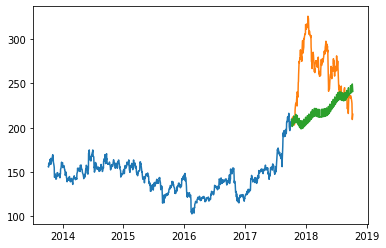

In [16]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])